# Unsupervised Learning: Trade&Ahead

## Compiled by:  Mashele Given Phazamisa

## Problem Statement

### Context

The stock market has consistently proven to be a good place to invest in and save for the future. There are a lot of compelling reasons to invest in stocks. It can help in fighting inflation, create wealth, and also provides some tax benefits. Good steady returns on investments over a long period of time can also grow a lot more than seems possible. Also, thanks to the power of compound interest, the earlier one starts investing, the larger the corpus one can have for retirement. Overall, investing in stocks can help meet life's financial aspirations.

It is important to maintain a diversified portfolio when investing in stocks in order to maximise earnings under any market condition. Having a diversified portfolio tends to yield higher returns and face lower risk by tempering potential losses when the market is down. It is often easy to get lost in a sea of financial metrics to analyze while determining the worth of a stock, and doing the same for a multitude of stocks to identify the right picks for an individual can be a tedious task. By doing a cluster analysis, one can identify stocks that exhibit similar characteristics and ones which exhibit minimum correlation. This will help investors better analyze stocks across different market segments and help protect against risks that could make the portfolio vulnerable to losses.


### Objective

Trade&Ahead is a financial consultancy firm who provide their customers with personalized investment strategies. They have hired you as a Data Scientist and provided you with data comprising stock price and some financial indicators for a few companies listed under the New York Stock Exchange. They have assigned you the tasks of analyzing the data, grouping the stocks based on the attributes provided, and sharing insights about the characteristics of each group.

### Data Dictionary

- Ticker Symbol: An abbreviation used to uniquely identify publicly traded shares of a particular stock on a particular stock market
- Company: Name of the company
- GICS Sector: The specific economic sector assigned to a company by the Global Industry Classification Standard (GICS) that best defines its business operations
- GICS Sub Industry: The specific sub-industry group assigned to a company by the Global Industry Classification Standard (GICS) that best defines its business operations
- Current Price: Current stock price in dollars
- Price Change: Percentage change in the stock price in 13 weeks
- Volatility: Standard deviation of the stock price over the past 13 weeks
- ROE: A measure of financial performance calculated by dividing net income by shareholders' equity (shareholders' equity is equal to a company's assets minus its debt)
- Cash Ratio: The ratio of a  company's total reserves of cash and cash equivalents to its total current liabilities
- Net Cash Flow: The difference between a company's cash inflows and outflows (in dollars)
- Net Income: Revenues minus expenses, interest, and taxes (in dollars)
- Earnings Per Share: Company's net profit divided by the number of common shares it has outstanding (in dollars)
- Estimated Shares Outstanding: Company's stock currently held by all its shareholders
- P/E Ratio: Ratio of the company's current stock price to the earnings per share 
- P/B Ratio: Ratio of the company's stock price per share by its book value per share (book value of a company is the net difference between that company's total assets and total liabilities)

## Importing necessary libraries

In [1]:
# first lets install the yellowbrick package

In [2]:
!pip install yellowbrick    

In [3]:
# Libraries to help with reading and manipulating data
import numpy as np
import pandas as pd

# Libraries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme(style='darkgrid')

# Removes the limit for the number of displayed columns
pd.set_option("display.max_columns", None)
# Sets the limit for the number of displayed rows
pd.set_option("display.max_rows", 200)

# to scale the data using z-score
from sklearn.preprocessing import StandardScaler

# to compute distances
from scipy.spatial.distance import cdist, pdist

# to perform k-means clustering and compute silhouette scores
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import yellowbrick

# to visualize the elbow curve and silhouette scores
from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer

# to perform hierarchical clustering, compute cophenetic correlation, and create dendrograms
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import   dendrogram , linkage, cophenet

# to suppress warnings
import warnings
warnings.filterwarnings("ignore")

## Loading the dataset

In [4]:
## Code to read the data. 
Data = pd.read_csv("stock_data.csv")

## Overview of the Dataset

### Checking the shape of the dataset

In [5]:
Data.shape   # code to check the dimension of the dataset

(340, 15)

### Observation:
The dataset consist of 340 rows and 15 columns.

### Checking few rows of the dataset

In [6]:
Data.head(10)   # code to print out the first ten rows of the dataset

,Ticker Symbol,Security,GICS Sector,GICS Sub Industry,Current Price,Price Change,Volatility,ROE,Cash Ratio,Net Cash Flow,Net Income,Earnings Per Share,Estimated Shares Outstanding,P/E Ratio,P/B Ratio
0,AAL,American Airlines Group,Industrials,Airlines,42.349998,9.999995,1.687151,135,51,-604000000,7610000000,11.39,6.681299e+08,3.718174,-8.784219
1,ABBV,AbbVie,Health Care,Pharmaceuticals,59.240002,8.339433,2.197887,130,77,51000000,5144000000,3.15,1.633016e+09,18.806350,-8.750068
2,ABT,Abbott Laboratories,Health Care,Health Care Equipment,44.910000,11.301121,1.273646,21,67,938000000,4423000000,2.94,1.504422e+09,15.275510,-0.394171
3,ADBE,Adobe Systems Inc,Information Technology,Application Software,93.940002,13.977195,1.357679,9,180,-240840000,629551000,1.26,4.996437e+08,74.555557,4.199651
4,ADI,"Analog Devices, Inc.",Information Technology,Semiconductors,55.320000,-1.827858,1.701169,14,272,315120000,696878000,0.31,2.247994e+09,178.451613,1.059810
5,ADM,Archer-Daniels-Midland Co,Consumer Staples,Agricultural Products,36.680000,-12.017268,1.516493,10,49,-189000000,1849000000,2.99,6.183946e+08,12.267559,7.496831
6,ADS,Alliance Data Systems,Information Technology,Data Processing & Outsourced Services,276.570007,6.189286,1.116976,30,25,90885000,596541000,8.91,6.695185e+07,31.040405,129.064585
7,AEE,Ameren Corp,Utilities,MultiUtilities,43.230000,2.174424,1.124186,9,14,287000000,636000000,2.60,2.446154e+08,16.626923,-0.719497
8,AEP,American Electric Power,Utilities,Electric Utilities,58.270000,2.371753,1.068485,11,9,13900000,2052300000,3.13,4.218978e+08,18.456543,-3.022649
9,AFL,AFLAC Inc,Financials,Life & Health Insurance,59.900002,3.027181,1.048295,14,99,-308000000,2533000000,5.88,4.307823e+08,10.187075,-1.883912


### Checking the data types of the columns for the dataset

In [7]:
# checking the column names and datatypes
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 340 entries, 0 to 339
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Ticker Symbol                 340 non-null    object 
 1   Security                      340 non-null    object 
 2   GICS Sector                   340 non-null    object 
 3   GICS Sub Industry             340 non-null    object 
 4   Current Price                 340 non-null    float64
 5   Price Change                  340 non-null    float64
 6   Volatility                    340 non-null    float64
 7   ROE                           340 non-null    int64  
 8   Cash Ratio                    340 non-null    int64  
 9   Net Cash Flow                 340 non-null    int64  
 10  Net Income                    340 non-null    int64  
 11  Earnings Per Share            340 non-null    float64
 12  Estimated Shares Outstanding  340 non-null    float64
 13  P/E R

### Observation :
The Trade and Ahead dataset  contain 15 columns  and 340 rows. <br> 
Four(4) columns are object types,four(4) columns integer types and  seven(7) columns as floating data type. <br>
The memory usage is 40 KB(kilobytes).

### Creating a copy of original data

In [8]:
#  Code to copy the data to another variable to avoid any changes to original data
data = Data.copy()

### Checking for duplicates and missing values

In [9]:
# checking for duplicate values
data.duplicated().sum()

0

In [10]:
# checking for missing values in the data
data.isnull().sum()

Ticker Symbol                   0
Security                        0
GICS Sector                     0
GICS Sub Industry               0
Current Price                   0
Price Change                    0
Volatility                      0
ROE                             0
Cash Ratio                      0
Net Cash Flow                   0
Net Income                      0
Earnings Per Share              0
Estimated Shares Outstanding    0
P/E Ratio                       0
P/B Ratio                       0
dtype: int64

### Observation:
No duplicates and missing values in the dataset

### Statistical summary of the dataset

In [11]:
data.describe().T   # code the print the statistical summary for numerical attributes

,count,mean,std,min,25%,50%,75%,max
Current Price,340.0,8.086234e+01,9.805509e+01,4.500000e+00,3.855500e+01,5.970500e+01,9.288000e+01,1.274950e+03
Price Change,340.0,4.078194e+00,1.200634e+01,-4.712969e+01,-9.394838e-01,4.819505e+00,1.069549e+01,5.505168e+01
Volatility,340.0,1.525976e+00,5.917984e-01,7.331632e-01,1.134878e+00,1.385593e+00,1.695549e+00,4.580042e+00
ROE,340.0,3.959706e+01,9.654754e+01,1.000000e+00,9.750000e+00,1.500000e+01,2.700000e+01,9.170000e+02
Cash Ratio,340.0,7.002353e+01,9.042133e+01,0.000000e+00,1.800000e+01,4.700000e+01,9.900000e+01,9.580000e+02
Net Cash Flow,340.0,5.553762e+07,1.946365e+09,-1.120800e+10,-1.939065e+08,2.098000e+06,1.698108e+08,2.076400e+10
Net Income,340.0,1.494385e+09,3.940150e+09,-2.352800e+10,3.523012e+08,7.073360e+08,1.899000e+09,2.444200e+10
Earnings Per Share,340.0,2.776662e+00,6.587779e+00,-6.120000e+01,1.557500e+00,2.895000e+00,4.620000e+00,5.009000e+01
Estimated Shares Outstanding,340.0,5.770283e+08,8.458496e+08,2.767216e+07,1.588482e+08,3.096751e+08,5.731175e+08,6.159292e+09
P/E Ratio,340.0,3.261256e+01,4.434873e+01,2.935451e+00,1.504465e+01,2.081988e+01,3.176476e+01,5.280391e+02


### Observation:
The current price exhibit a positively skewed distribution with mean greater than median. <br>
Price changes ranges from -4,7 to 5,5. <br>
About 75% of the data has ROE of 2.7% and above. <br>
The net income is skewed to the left with mean less than median. <br>
75% of the data has net income of 1.9 dollars and above. <br>


## Exploratory Data Analysis

### Univariate analysis

In [16]:
# function to plot a boxplot and a histogram along the same scale.


def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to the show density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--")  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-")  # Add median to the histogram

**`Current Price`**

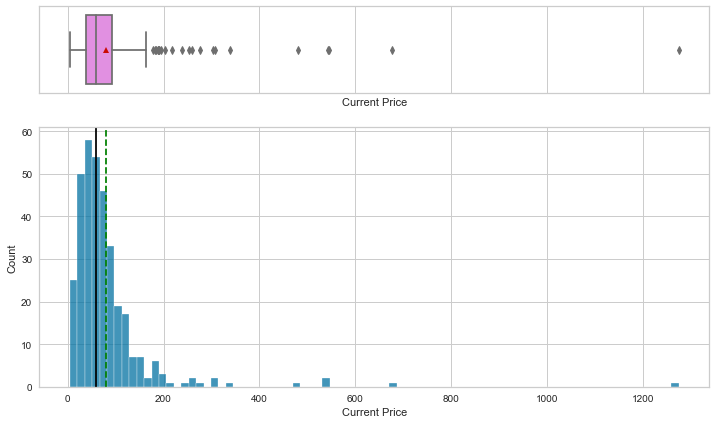

In [17]:
histogram_boxplot(data, 'Current Price')  # code to plot a boxplot and histogram for current stock price

### Observation:
The current price has distribution that is skewed to the right with mean greater than the median.<br>
The current price has outliers on the right side of the whisker. 

**`Price Change`**

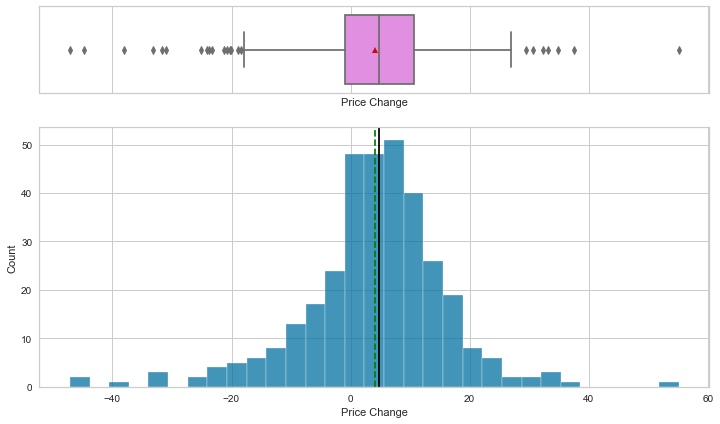

In [18]:
histogram_boxplot(data,"Price Change")  ## Code to plot boxplot and histogram for Price Change

### Observation:
The price change data is approximately skewed to the left with mean less than the median.  <br>
The price change has outliers on both sides of the whiskers.

**`Volatility`**

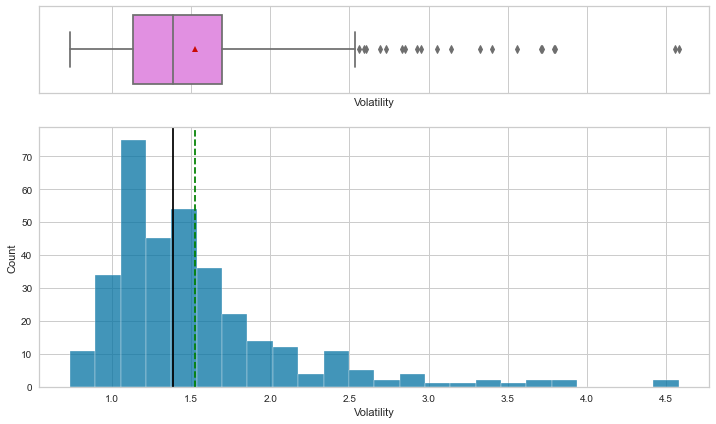

In [19]:
histogram_boxplot(data,"Volatility")  ## Code to plot histogram and boxplot for Volatility

### Observation:
The volatility data exbihit a positive skewness with mean greater than the median. <br>
75% of the data has volatility of 1.6 and above. 


**`ROE`**

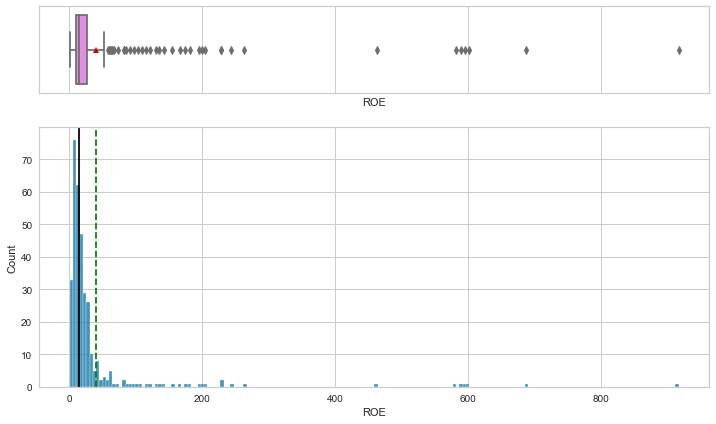

In [20]:
histogram_boxplot(data,"ROE")  ## Code to plot histogram and boxplot for ROE(Return on equity)

### Observation:
The return on equity exhibit a positive skewness with mean greater than median. <br>
ROE data has outliers on the right side of the whisker. 

**`Cash Ratio`**

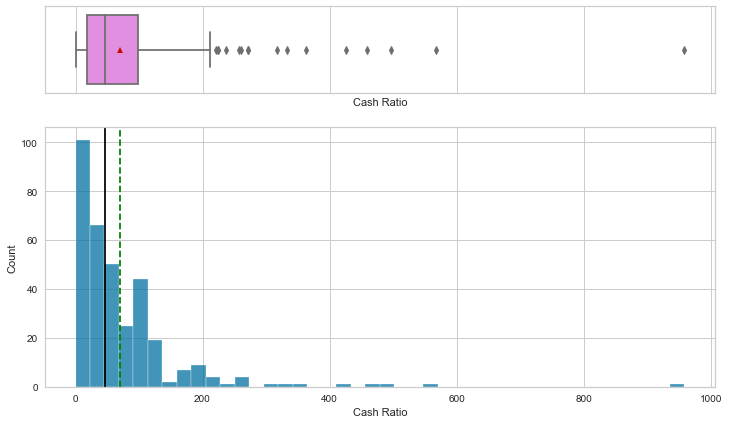

In [21]:
histogram_boxplot(data,"Cash Ratio")  ## Code to plot histogram and boxplot for Cash Ratio

### Observation:
 The cash ratio data exhibit a  positively skewed distribution with mean greater than the median. <br>
 The cash ratio data range from zero to roughly 200 with outliers on the right side of the whisker. <br>
 


**`Net Cash Flow`**

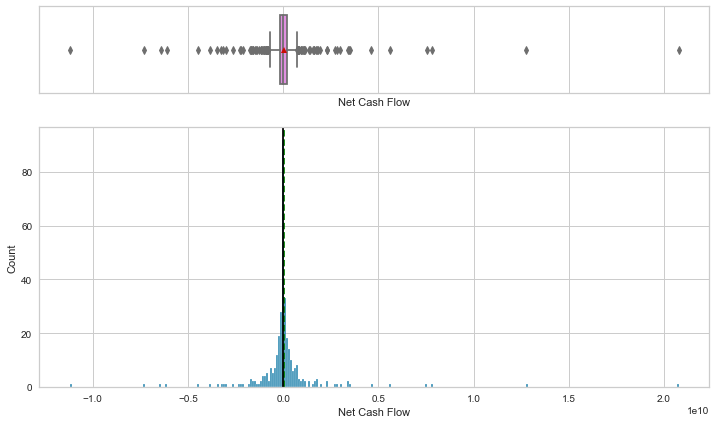

In [22]:
histogram_boxplot(data,"Net Cash Flow")  ## Code to plot histogram and boxplot for Net Cash Flow

### Observation:
The net cash flow data is normally distributed with mean equal to the median.  <br>
The dataset exhbits outliers on both side of the whiskers with values that range from -1 to 2. <br>


**`Net Income`**

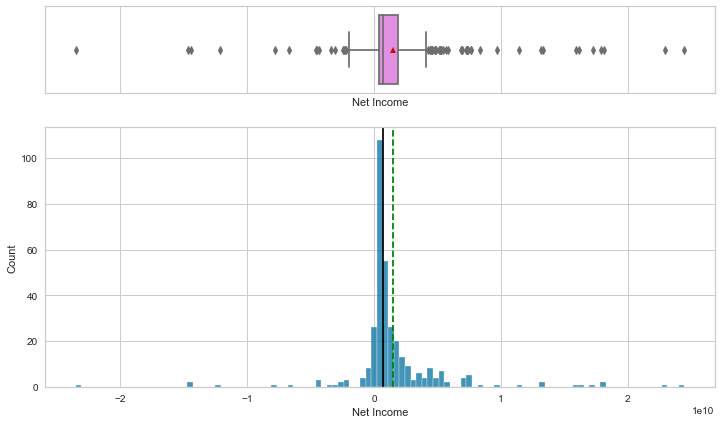

In [23]:
histogram_boxplot(data,"Net Income")  ## Code to plot histogram and boxplot for Net Income

### Observation:
The net income data shows a distribution that is skewed to the right.<br>
Most of the stock prices consists of net income that range from zero to roughly 0.8 dollars.  <br>
The net incomes data exhibit outliers on both side of the whiskers.


**`Earnings Per Share`**

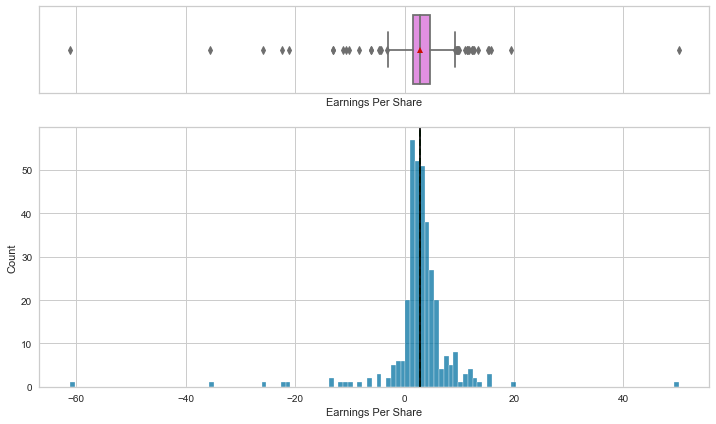

In [24]:
histogram_boxplot(data,"Earnings Per Share")  ## Code to plot boxplot and histogram for Earnings Per Share(EPS)

### Observation:
The earnings per share data exhibit an approximately normal distribution with outliers on both side of the whiskers.


**`Estimated Shares Outstanding`**

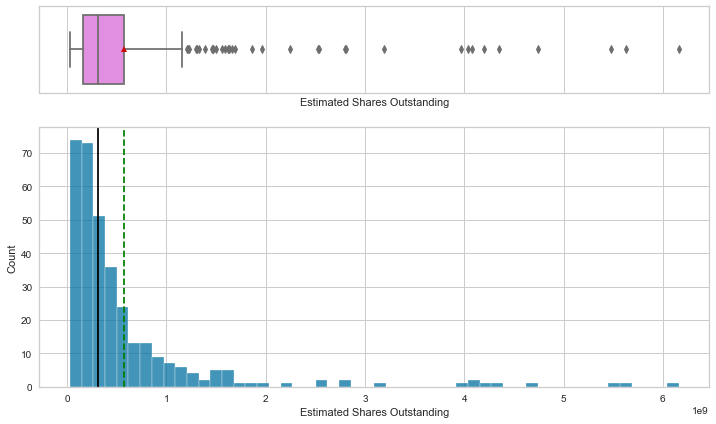

In [25]:
histogram_boxplot(data,"Estimated Shares Outstanding") # code to plot boxplot and histogram for estimated shares outstnading

**`P/E Ratio`**

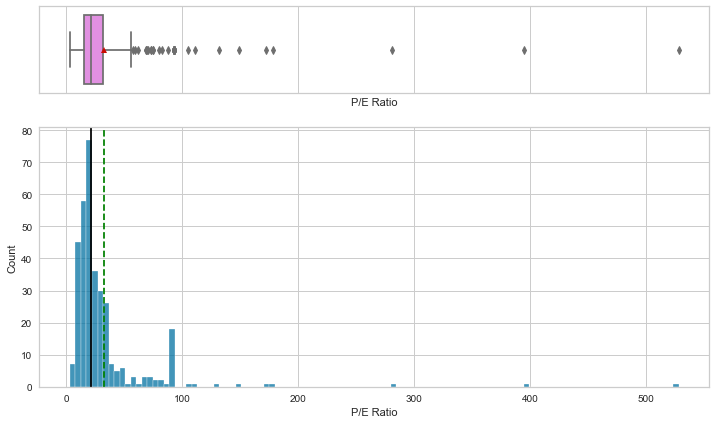

In [26]:
histogram_boxplot(data,"P/E Ratio")  ## Code to plot histogram and boxplot for P/E Ratio

### Observation:
The price to earnings ratio is skewed to the right with mean greater than the median. <br>
The P/E ratio  ranges from 0 to 100 with outliers on the right side of the whisker. 


**`P/B Ratio`**

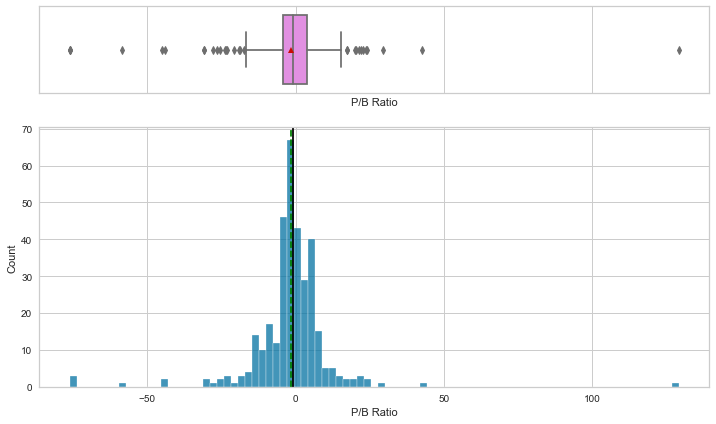

In [27]:
histogram_boxplot(data,"P/B Ratio")  ## Code to plot histogram and boxplot for P/B ratio

### Observation:
The P/B ratio exhibit a normal distribution with mean equal to the median. <br>
About 75% of the P/B ratios have values above 0 , with outliers on both side of the whiskers. 


In [28]:
# function to create labeled barplots

def labeled_barplot(df, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(df[feature])  # length of the column
    count = df[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=df,
        x=feature,
        palette="Paired",
        order=df[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

**`GICS Sector`**

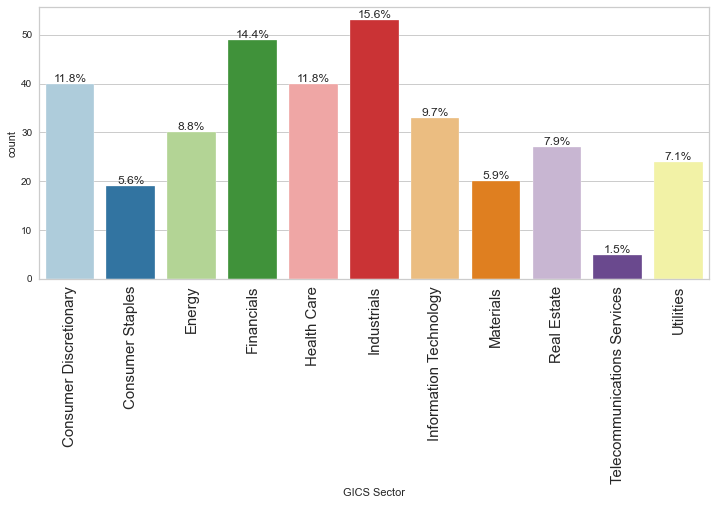

In [29]:
labeled_barplot(data, 'GICS Sector', perc=True)  # code to plot a bar graph for different sectors 

### Observation:
About 80% of the economic sector constitute of Financials,Industrials,Consumer discretionary,Health care,Information technology,Energy and Real estate. <br>
Telecommunications is the sector that constitute the least percentage. <br>

**`GICS Sub Industry`**

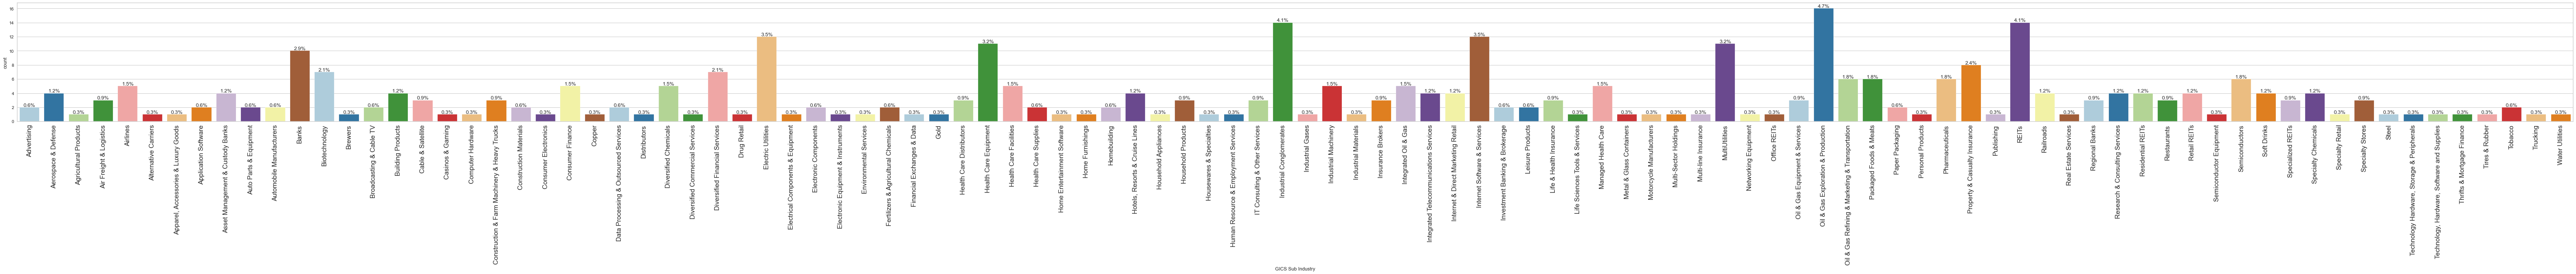

In [30]:
labeled_barplot(data,"GICS Sub Industry",perc=True)  ## Code to create a labelled barplot for GICS Sub Industry

### Bivariate Analysis

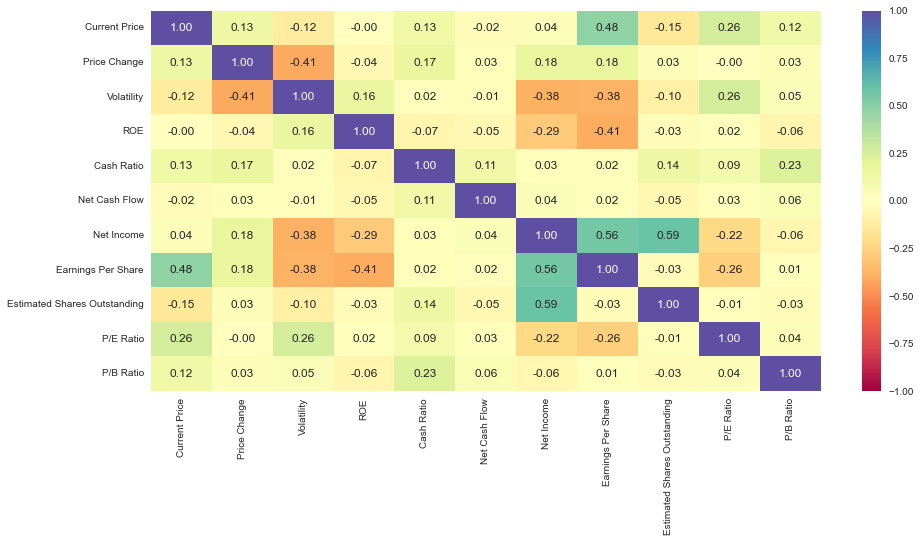

In [31]:
# correlation check
plt.figure(figsize=(15, 7))
sns.heatmap(
    data.corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral")
plt.show()

### Observation:
Net income and Estimated shares outstanding are highly correlated. <br>
Net income and Earnings per share  are also are highly correlated. <br>
Current price and Earnings per share exhibits a high a correlation. <br>
There is a weak negative correlation between volatility with earning per share and Net income respectively.<br>
ROE and earnings per share also exhibits a weak negative correlation. <br>
Most attributes/features are uncorrelated as evidenced by low values of correlation. <br>
As a results there are no strong correlation exists between the independent variables, hence no multicollinearity issues present.

**Let's check the stocks of which economic sector have seen the maximum price increase on average.**

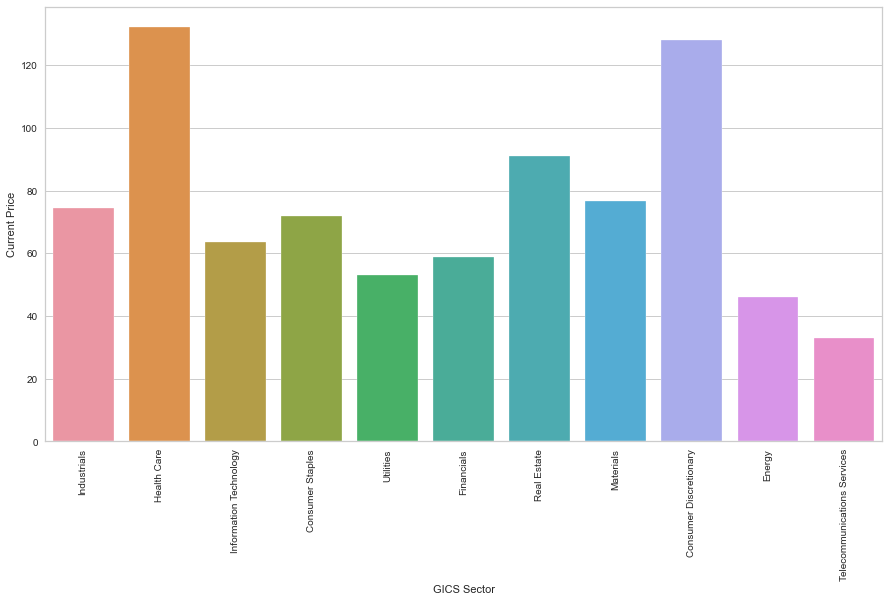

In [32]:
plt.figure(figsize=(15,8))
sns.barplot(data=data, x="GICS Sector", y="Current Price", ci=False)  ## Complete the code to choose the right variables
plt.xticks(rotation=90)
plt.show()

### Observation:
Customer discretionary,Health care and Real estate are the top three economic sector that exhbits a maximum price increase on average.


**Cash ratio provides a measure of a company's ability to cover its short-term obligations using only cash and cash equivalents. Let's see how the average cash ratio varies across economic sectors.**

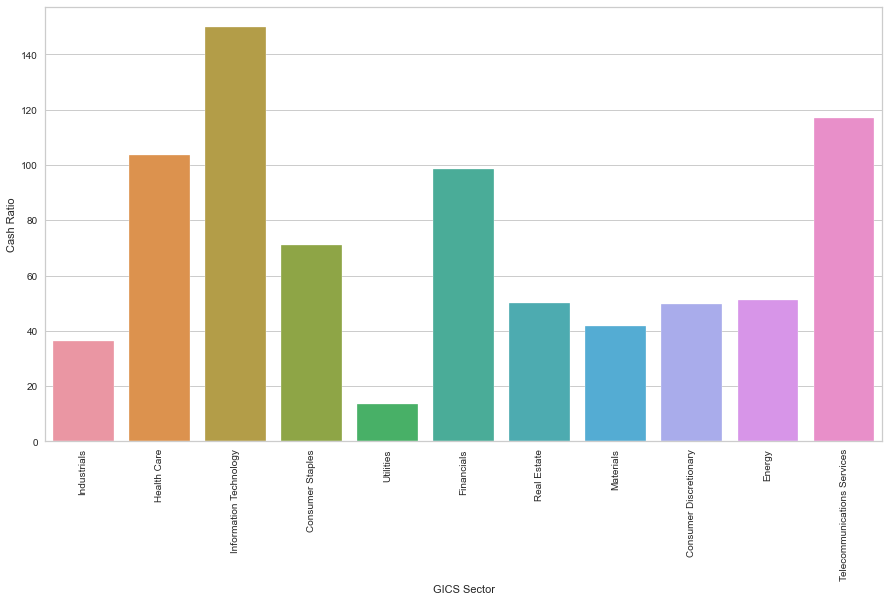

In [33]:
plt.figure(figsize=(15,8))
sns.barplot(data=data, x="GICS Sector", y="Cash Ratio", ci=False)  ## Code to plot a bar graphs for cash ratio across sectors
plt.xticks(rotation=90)
plt.show()

### Observation:
Information technology ,Telecommunications services,Financials,Health care and consumer Staples are the major five economics sectors with the highest cash ratio on average.


**P/E ratios can help determine the relative value of a company's shares as they signify the amount of money an investor is willing to invest in a single share of a company per dollar of its earnings. Let's see how the P/E ratio varies, on average, across economic sectors.**

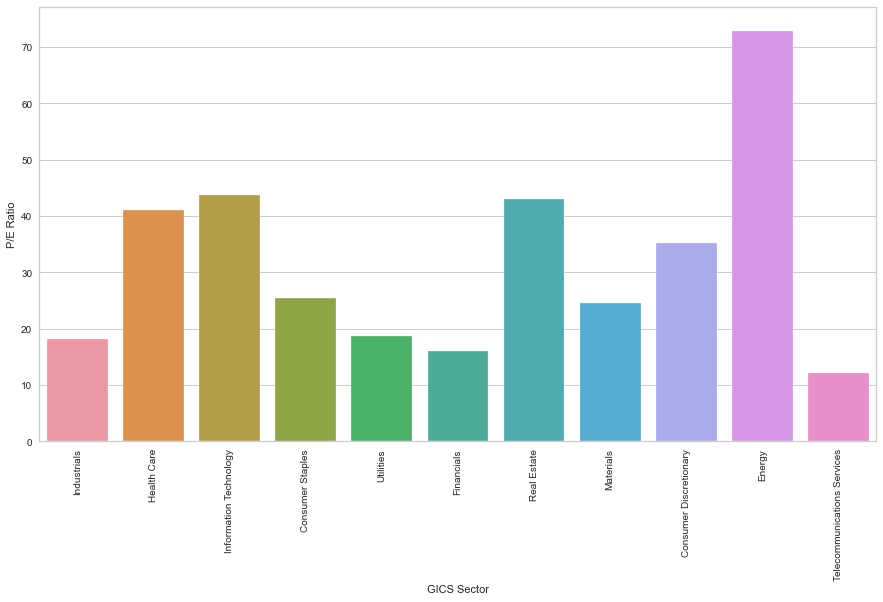

In [34]:
plt.figure(figsize=(15,8))
sns.barplot(data=data, x="GICS Sector", y="P/E Ratio", ci=False) ## Code to plot a bar gragh for P/E ratio relative to GICS sector
plt.xticks(rotation=90)
plt.show()

### Observation:
Energy is the leading economic sector with the highest P/E ratio. <br>
These might be due to lower earnings(net income). 

**Volatility accounts for the fluctuation in the stock price. A stock with high volatility will witness sharper price changes, making it a riskier investment. Let's see how volatility varies, on average, across economic sectors.**

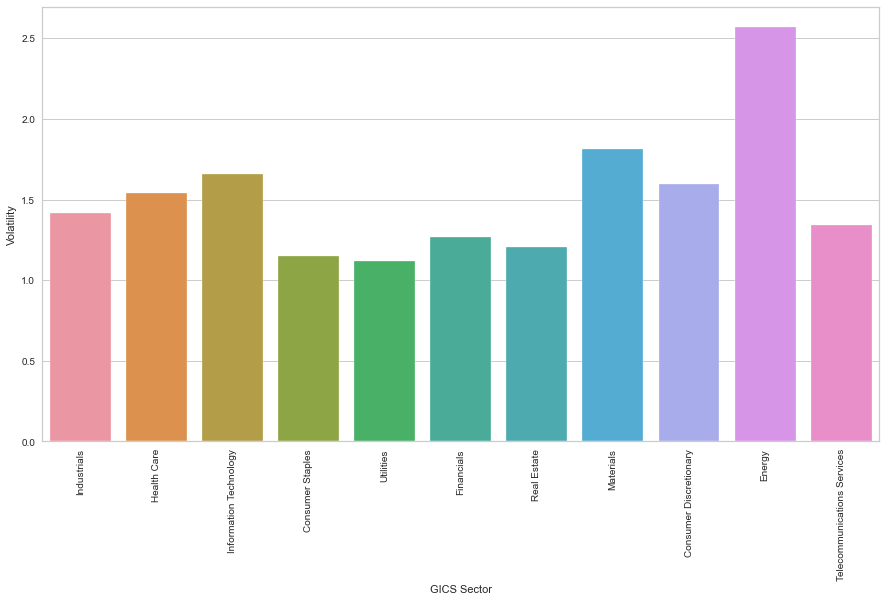

In [35]:
plt.figure(figsize=(15,8))
sns.barplot(data=data, x="GICS Sector",y="Volatility", ci=False)  ## Code to plot the bar graphs for volatility across sectors
plt.xticks(rotation=90)
plt.show()

### Observation:
The energy as the economic sector has high volatility that make it a riskier sector for investment.

## Data Preprocessing

### Outlier Check

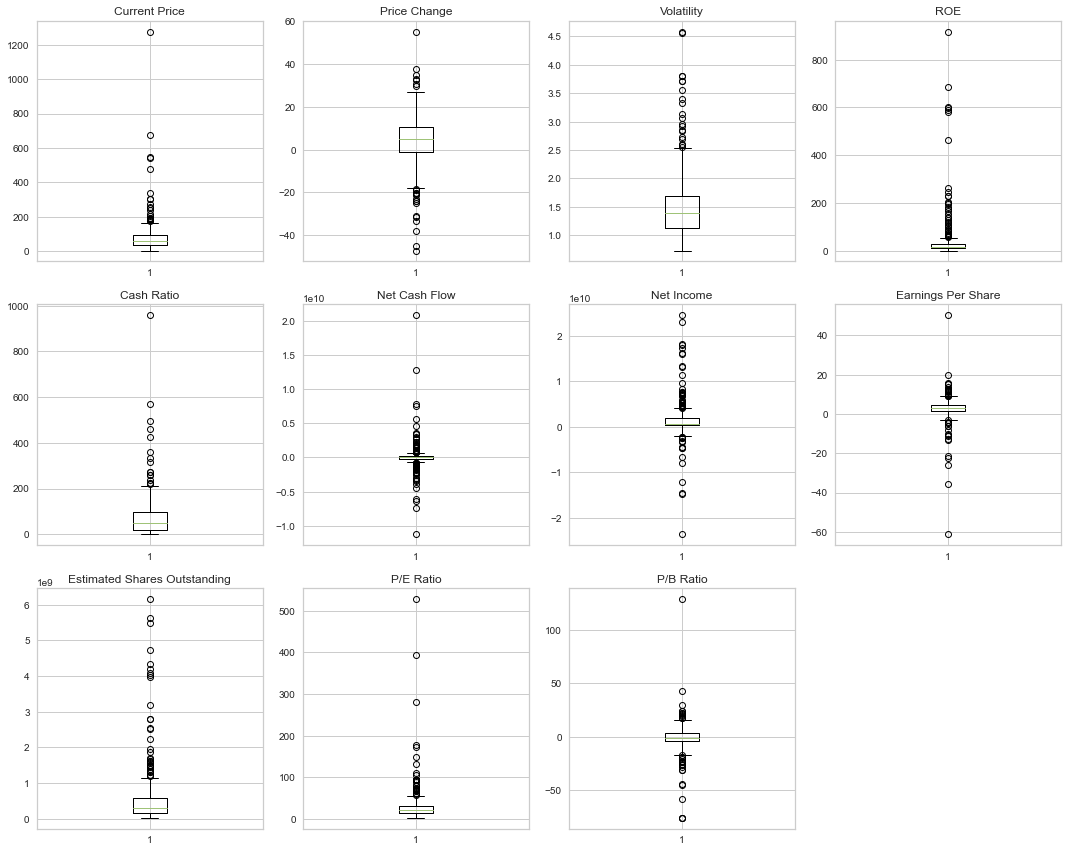

In [36]:
## Code to  plot the boxplots of all numerical columns to check for outliers.
plt.figure(figsize=(15, 12))

numeric_columns = data.select_dtypes(include=np.number).columns.tolist()
for i, variable in enumerate(numeric_columns):
    plt.subplot(3, 4, i + 1)
    plt.boxplot(data[variable], whis=1.5)
    plt.tight_layout()
    plt.title(variable)

plt.show()

### Scaling

In [37]:
subset=data[numeric_columns].copy()    # Code to copy the numerical variables 

In [38]:
subset.head()

,Current Price,Price Change,Volatility,ROE,Cash Ratio,Net Cash Flow,Net Income,Earnings Per Share,Estimated Shares Outstanding,P/E Ratio,P/B Ratio
0,42.349998,9.999995,1.687151,135,51,-604000000,7610000000,11.39,6.681299e+08,3.718174,-8.784219
1,59.240002,8.339433,2.197887,130,77,51000000,5144000000,3.15,1.633016e+09,18.806350,-8.750068
2,44.910000,11.301121,1.273646,21,67,938000000,4423000000,2.94,1.504422e+09,15.275510,-0.394171
3,93.940002,13.977195,1.357679,9,180,-240840000,629551000,1.26,4.996437e+08,74.555557,4.199651
4,55.320000,-1.827858,1.701169,14,272,315120000,696878000,0.31,2.247994e+09,178.451613,1.059810


In [39]:
subset.shape   # code the check the dimension of the numerical dataset

(340, 11)

In [40]:
# Code to scale the data before clustering
scaler = StandardScaler()
subset = data[numeric_columns].copy()
subset_scaled = scaler.fit_transform(subset)

In [41]:
# creating a dataframe of the scaled data
subset_scaled_data = pd.DataFrame(subset_scaled, columns=subset.columns)

In [42]:
subset_scaled_data.head()

,Current Price,Price Change,Volatility,ROE,Cash Ratio,Net Cash Flow,Net Income,Earnings Per Share,Estimated Shares Outstanding,P/E Ratio,P/B Ratio
0,-0.393341,0.493950,0.272749,0.989601,-0.210698,-0.339355,1.554415,1.309399,0.107863,-0.652487,-0.506653
1,-0.220837,0.355439,1.137045,0.937737,0.077269,-0.002335,0.927628,0.056755,1.250274,-0.311769,-0.504205
2,-0.367195,0.602479,-0.427007,-0.192905,-0.033488,0.454058,0.744371,0.024831,1.098021,-0.391502,0.094941
3,0.133567,0.825696,-0.284802,-0.317379,1.218059,-0.152497,-0.219816,-0.230563,-0.091622,0.947148,0.424333
4,-0.260874,-0.492636,0.296470,-0.265515,2.237018,0.133564,-0.202703,-0.374982,1.978399,3.293307,0.199196


## K-means Clustering

### Checking Elbow Plot

In [43]:
k_means_data = subset_scaled_data.copy()    # code to copy the scaled dataset

Number of Clusters: 1 	Average Distortion: 2.5425069919221697
Number of Clusters: 2 	Average Distortion: 2.382318498894466
Number of Clusters: 3 	Average Distortion: 2.2692367155390745
Number of Clusters: 4 	Average Distortion: 2.1745559827866363
Number of Clusters: 5 	Average Distortion: 2.128799332840716
Number of Clusters: 6 	Average Distortion: 2.080400099226289
Number of Clusters: 7 	Average Distortion: 2.0289794220177395
Number of Clusters: 8 	Average Distortion: 1.964144163389972
Number of Clusters: 9 	Average Distortion: 1.9221492045198068
Number of Clusters: 10 	Average Distortion: 1.8513913649973124
Number of Clusters: 11 	Average Distortion: 1.8024134734578485
Number of Clusters: 12 	Average Distortion: 1.7900931879652673
Number of Clusters: 13 	Average Distortion: 1.7417609203336912
Number of Clusters: 14 	Average Distortion: 1.673559857259703


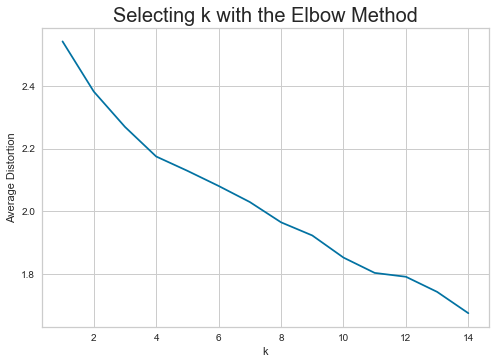

CPU times: total: 12.9 s
Wall time: 9.06 s


In [44]:
%%time
clusters = range(1, 15)
meanDistortions = []

for k in clusters:
    model = KMeans(n_clusters=k, random_state=1)
    model.fit(subset_scaled_data)
    prediction = model.predict(k_means_data)
    distortion = ( sum(np.min(cdist(k_means_data, model.cluster_centers_, "euclidean"), axis=1))
        / k_means_data.shape[0] )

    meanDistortions.append(distortion)

    print("Number of Clusters:", k, "\tAverage Distortion:", distortion)

plt.plot(clusters, meanDistortions, "bx-")
plt.xlabel("k")
plt.ylabel("Average Distortion")
plt.title("Selecting k with the Elbow Method", fontsize=20)
plt.show()

### Observation:
The using the elbow curve , it starts to  flatten between k of 2 and 4. <br>
Also start to flatten between k of 11 to 12. <br>
The optimal number of clusters can be approximately 3. 

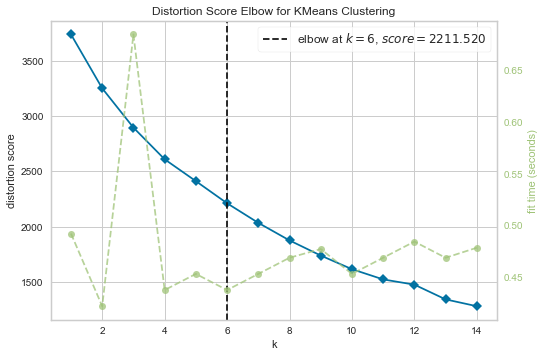

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [45]:
model = KMeans(random_state=1)
visualizer = KElbowVisualizer(model, k=(1, 15), timings=True);
visualizer.fit(k_means_data);  #  code to fit the data to the visualizer
visualizer.show()  #  code to finalize and render figure

### Observation:
The optimal number of clusters from the curve above is approximatley 6. 

### Let's check the silhouette scores

For n_clusters = 2, the silhouette score is 0.43969639509980457)
For n_clusters = 3, the silhouette score is 0.4644405674779403)
For n_clusters = 4, the silhouette score is 0.4577225970476733)
For n_clusters = 5, the silhouette score is 0.43228336443659804)
For n_clusters = 6, the silhouette score is 0.40054227372136175)
For n_clusters = 7, the silhouette score is 0.3976335364987305)
For n_clusters = 8, the silhouette score is 0.40278401969450467)
For n_clusters = 9, the silhouette score is 0.3778585981433699)
For n_clusters = 10, the silhouette score is 0.13458938329968687)
For n_clusters = 11, the silhouette score is 0.1421832155528444)
For n_clusters = 12, the silhouette score is 0.2044669621527429)
For n_clusters = 13, the silhouette score is 0.23424874810104204)
For n_clusters = 14, the silhouette score is 0.12102526472829901)


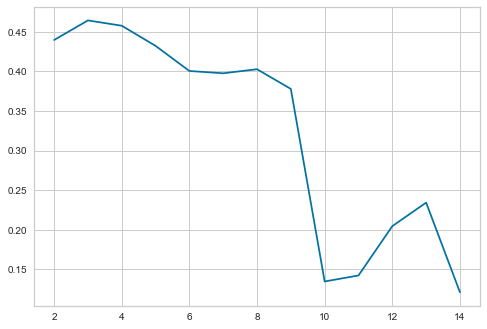

CPU times: total: 11.8 s
Wall time: 6.69 s


In [46]:
%%time
sil_score = []
cluster_list = range(2, 15)
for n_clusters in cluster_list:
    clusterer = KMeans(n_clusters=n_clusters, random_state=1)
    preds = clusterer.fit_predict((subset_scaled_data))
    score = silhouette_score(k_means_data, preds)
    sil_score.append(score)
    print("For n_clusters = {}, the silhouette score is {})".format(n_clusters, score))

plt.plot(cluster_list, sil_score)
plt.show()

### Observation:
Using the Silhoutte score plot , k =3 is the optimal number of clusters with the highest silhoutte score.

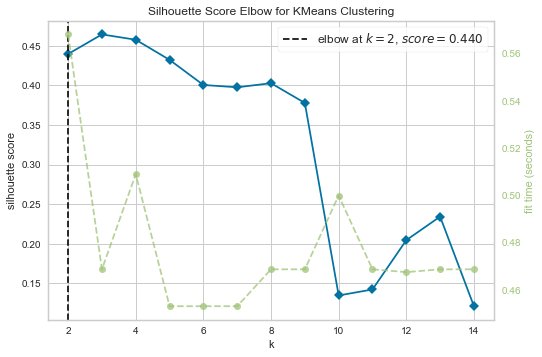

<AxesSubplot:title={'center':'Silhouette Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='silhouette score'>

In [47]:
model = KMeans(random_state=1)
visualizer = KElbowVisualizer(model, k=(2, 15), metric="silhouette", timings=True)
visualizer.fit(k_means_data)        ## code to fit the data to the visualizer
visualizer.show()                ## code to finalize and render figure

### Observation:
The optimal number of clusters from the curve is roughly k=3. 

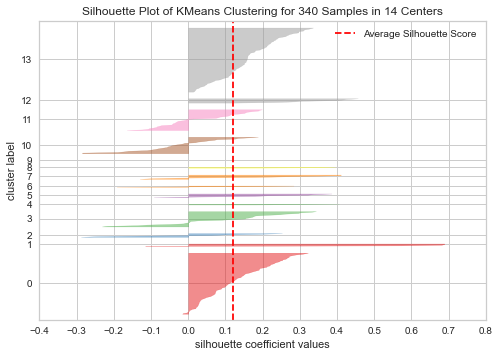

<AxesSubplot:title={'center':'Silhouette Plot of KMeans Clustering for 340 Samples in 14 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [48]:
# finding optimal no. of clusters with silhouette coefficients
visualizer = SilhouetteVisualizer(KMeans(n_clusters=n_clusters, random_state=1))  ## Code to visualize the silhouette scores for certain number of clusters
visualizer.fit(k_means_data)
visualizer.show()

### Observation:
The optimal number of clusters using silhouette cofficients is  three(3).

### Creating Final Model

In [49]:
# final K-means model
kmeans = KMeans(n_clusters=3, random_state=1)  ## Code to choose the number of clusters from a K-means clustering model
kmeans.fit(k_means_data)

KMeans(n_clusters=3, random_state=1)

In [50]:
# creating a copy of the original data
data1 = data.copy()

# adding kmeans cluster labels to the original and scaled dataframes
k_means_data["KM_segments"] = kmeans.labels_
data1["KM_segments"] = kmeans.labels_

### Cluster Profiling

In [51]:
km_cluster_profile = data1.groupby("KM_segments").mean()  ## Code to groupby the cluster labels

In [52]:
km_cluster_profile["count_in_each_segment"] = (
    data1.groupby("KM_segments")["Security"].count().values  ## Code to groupby the cluster labels
)

In [53]:
km_cluster_profile.style.highlight_max(color="lightgreen", axis=0)

,Current Price,Price Change,Volatility,ROE,Cash Ratio,Net Cash Flow,Net Income,Earnings Per Share,Estimated Shares Outstanding,P/E Ratio,P/B Ratio,count_in_each_segment
KM_segments,,,,,,,,,,,,
0,52.142857,6.779993,1.175153,26.142857,140.142857,760285714.285714,13368785714.285715,3.769286,3838879870.871428,20.654832,-3.529270,14
1,64.183438,-10.557046,2.797776,96.531250,70.718750,159171125.000000,-3250005968.750000,-7.886875,526459323.057500,111.333230,1.783445,32
2,84.045331,5.542488,1.404255,34.040816,66.608844,10698350.340136,1445333183.673469,3.890051,427206184.715408,24.613743,-2.013147,294


In [54]:
## Code to print the companies in each cluster
for cl in data1["KM_segments"].unique():
    print("In cluster {}, the following companies are present:".format(cl))
    print(data1[data1["KM_segments"] == cl]["Security"].unique())
    print()

In cluster 2, the following companies are present:
['American Airlines Group' 'AbbVie' 'Abbott Laboratories'
 'Adobe Systems Inc' 'Archer-Daniels-Midland Co' 'Alliance Data Systems'
 'Ameren Corp' 'American Electric Power' 'AFLAC Inc'
 'American International Group, Inc.' 'Apartment Investment & Mgmt'
 'Assurant Inc' 'Arthur J. Gallagher & Co.' 'Akamai Technologies Inc'
 'Albemarle Corp' 'Alaska Air Group Inc' 'Allstate Corp' 'Allegion'
 'Applied Materials Inc' 'AMETEK Inc' 'Affiliated Managers Group Inc'
 'Amgen Inc' 'Ameriprise Financial' 'American Tower Corp A'
 'AutoNation Inc' 'Anthem Inc.' 'Aon plc' 'Amphenol Corp' 'Arconic Inc'
 'Activision Blizzard' 'AvalonBay Communities, Inc.' 'Broadcom'
 'American Water Works Company Inc' 'American Express Co' 'Boeing Company'
 'Baxter International Inc.' 'BB&T Corporation' 'Bard (C.R.) Inc.'
 'BIOGEN IDEC Inc.' 'The Bank of New York Mellon Corp.' 'Ball Corp'
 'Bristol-Myers Squibb' 'Boston Scientific' 'BorgWarner'
 'Boston Properties' 'Cate

In [55]:
data1.groupby(["KM_segments", "GICS Sector"])['Security'].count()

KM_segments  GICS Sector                
0            Consumer Discretionary          1
             Consumer Staples                1
             Energy                          1
             Financials                      4
             Health Care                     3
             Information Technology          2
             Telecommunications Services     2
1            Consumer Discretionary          2
             Energy                         23
             Health Care                     1
             Industrials                     1
             Information Technology          4
             Materials                       1
2            Consumer Discretionary         37
             Consumer Staples               18
             Energy                          6
             Financials                     45
             Health Care                    36
             Industrials                    52
             Information Technology         27
             Materi

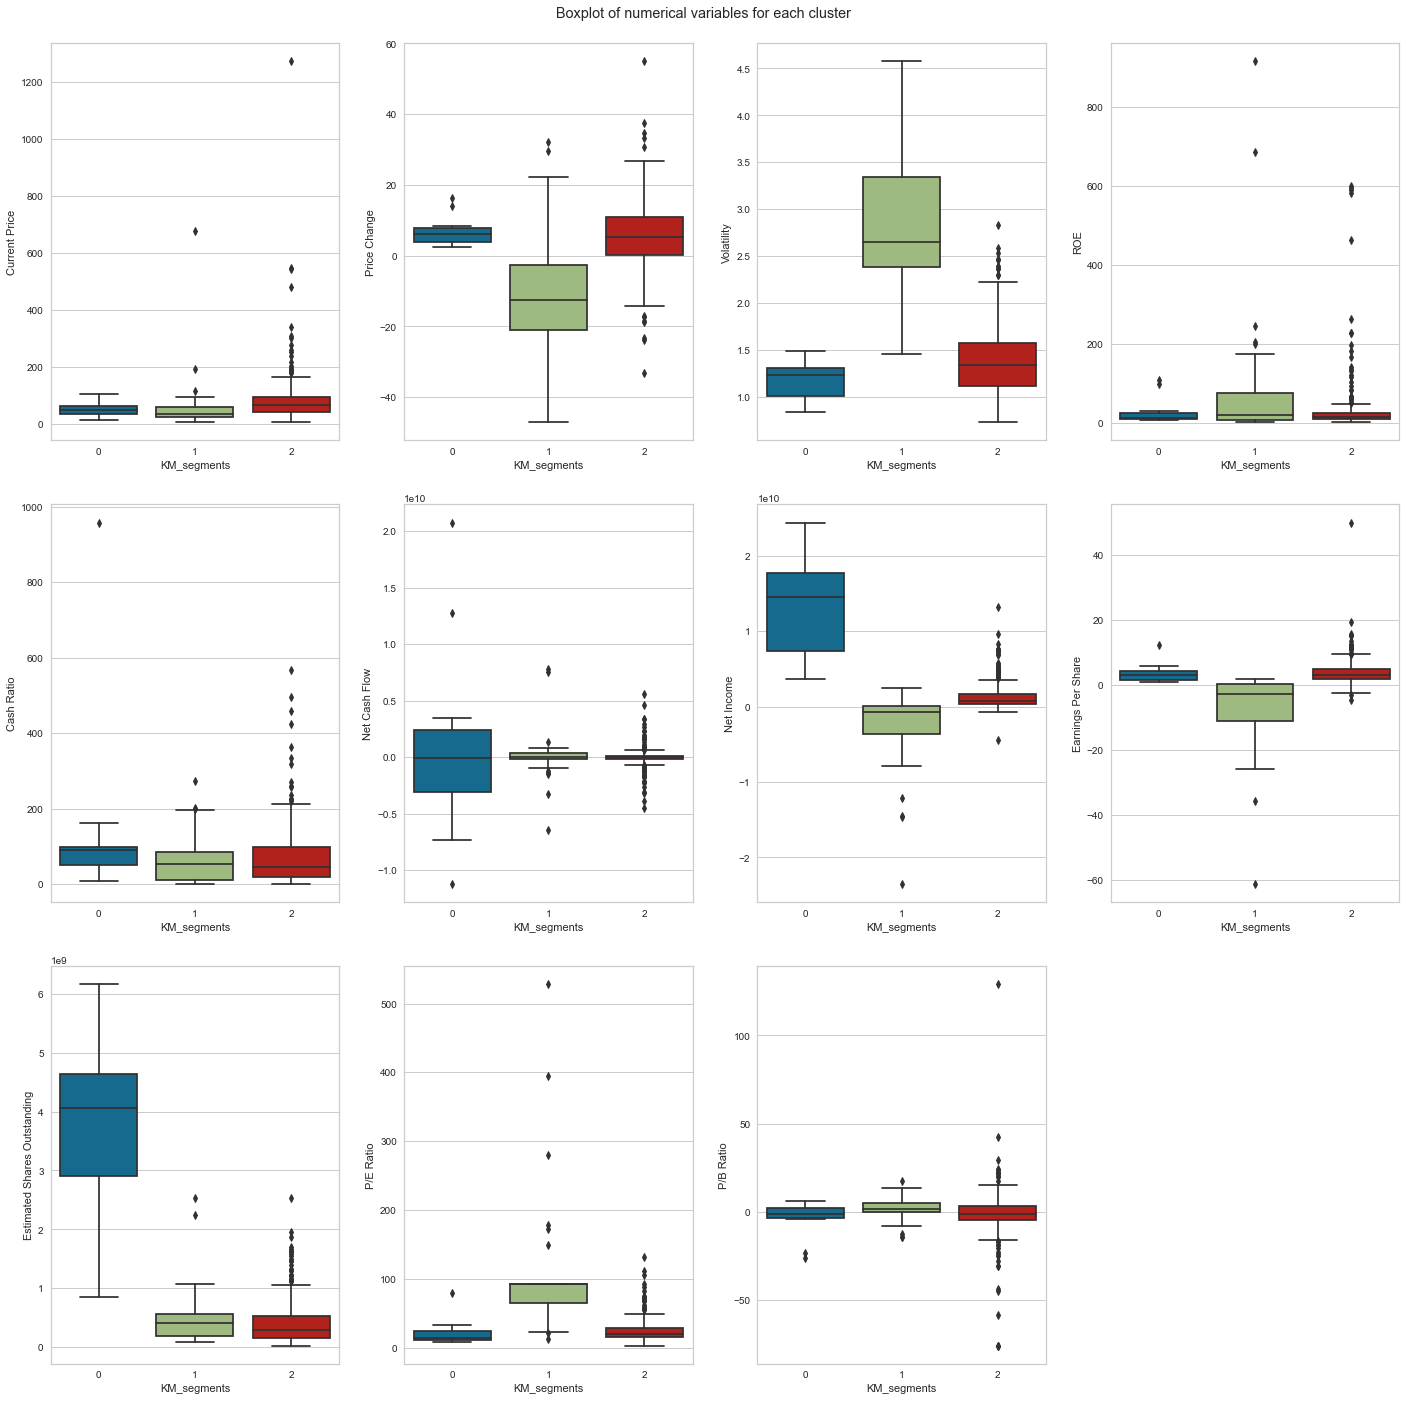

In [56]:
plt.figure(figsize=(20, 20))
plt.suptitle("Boxplot of numerical variables for each cluster")

# selecting numerical columns
num_col = data.select_dtypes(include=np.number).columns.tolist()

for i, variable in enumerate(num_col):
    plt.subplot(3, 4, i + 1)
    sns.boxplot(data=data1, x="KM_segments", y=variable)

plt.tight_layout(pad=2.0)

### Insights

#### Cluster 0:  <br>

. Consists of 14 observations that are similar. <br>
. Security/companies in this cluster have higher net income as compared to other clusters. <br>
. Most companies have current prices that range from zero to 200 dollars with price changes that range for 0 to 20 dollars. <br>
. ROE is moderately low for companies that are in this cluster. <br>
. P/E ratio is very low due to higher earnings.<br> 
. Higher estimating shares oustanding  as compared to other clusters. <br>

####  Cluster 1:

. Consists of 32 observations that are similar. <br>
. Volatility is higher as compared to other clusters. <br>
. ROE is moderately higher as compared to other clusters  due to higher risk involved. <br>
. P/E ratio is relatively higher as compared to other clusters due to low earnings(net income).<br>

#### Cluster 2:<br>

. Consists of 294 observations that are similar. <br>
. ROE is relatively low with outliers on the right of the whisker. <br>
. P/B ratio is moderately higher as compared to other clusters. <br>

## Hierarchical Clustering

### Computing Cophenetic Correlation

In [57]:
hc_data = subset_scaled_data.copy()   # code to make a copy of the scaled data

In [58]:
hc_data.head()  # code the check the first five rows of the scaled data

,Current Price,Price Change,Volatility,ROE,Cash Ratio,Net Cash Flow,Net Income,Earnings Per Share,Estimated Shares Outstanding,P/E Ratio,P/B Ratio
0,-0.393341,0.493950,0.272749,0.989601,-0.210698,-0.339355,1.554415,1.309399,0.107863,-0.652487,-0.506653
1,-0.220837,0.355439,1.137045,0.937737,0.077269,-0.002335,0.927628,0.056755,1.250274,-0.311769,-0.504205
2,-0.367195,0.602479,-0.427007,-0.192905,-0.033488,0.454058,0.744371,0.024831,1.098021,-0.391502,0.094941
3,0.133567,0.825696,-0.284802,-0.317379,1.218059,-0.152497,-0.219816,-0.230563,-0.091622,0.947148,0.424333
4,-0.260874,-0.492636,0.296470,-0.265515,2.237018,0.133564,-0.202703,-0.374982,1.978399,3.293307,0.199196


In [59]:
%%time
## Code to list  the distance metrics
distance_metrics = ["euclidean","cityblock","chebyshev","mahalanobis"] 

## Code to list the linkage methods
linkage_methods = ["complete","single","average"] 

high_cophenet_corr = 0
high_dm_lm = [0, 0]

for dm in distance_metrics:
    for lm in linkage_methods:
        Z = linkage(hc_data, metric=dm, method=lm)
        c, coph_dists = cophenet(Z, pdist(hc_data))
        print(
            "Cophenetic correlation for {} distance and {} linkage is {}.".format(
               dm.capitalize(), lm, c
            )
        )
        if high_cophenet_corr < c:
            high_cophenet_corr = c
            high_dm_lm[0] = dm
            high_dm_lm[1] = lm
            
# printing the combination of distance metric and linkage method with the highest cophenetic correlation
print('*'*100)
print(
    "Highest cophenetic correlation is {}, which is obtained with {} distance and {} linkage.".format(
        high_cophenet_corr, high_dm_lm[0].capitalize(), high_dm_lm[1]
    )
)

Cophenetic correlation for Euclidean distance and complete linkage is 0.7873280186580672.
Cophenetic correlation for Euclidean distance and single linkage is 0.9232271494002922.
Cophenetic correlation for Euclidean distance and average linkage is 0.9422540609560814.
Cophenetic correlation for Cityblock distance and complete linkage is 0.7375328863205818.
Cophenetic correlation for Cityblock distance and single linkage is 0.9334186366528574.
Cophenetic correlation for Cityblock distance and average linkage is 0.9302145048594667.
Cophenetic correlation for Chebyshev distance and complete linkage is 0.598891419111242.
Cophenetic correlation for Chebyshev distance and single linkage is 0.9062538164750717.
Cophenetic correlation for Chebyshev distance and average linkage is 0.9338265528030499.
Cophenetic correlation for Mahalanobis distance and complete linkage is 0.7925307202850004.
Cophenetic correlation for Mahalanobis distance and single linkage is 0.9259195530524591.
Cophenetic correla

**Lets check different linkage methods with Euclidean distance only.**

In [60]:
# list of linkage methods
linkage_methods = ["complete","single","average","centroid","ward","weighted"] ## code to list the different linkgage methods

high_cophenet_corr = 0
high_dm_lm = [0, 0]

for lm in linkage_methods:
    Z = linkage(hc_data, metric="euclidean", method=lm)
    c, coph_dists = cophenet(Z, pdist(hc_data))
    print("Cophenetic correlation for {} linkage is {}.".format(lm, c))
    if high_cophenet_corr < c:
        high_cophenet_corr = c
        high_dm_lm[0] = "euclidean"
        high_dm_lm[1] = lm
        
# printing the combination of distance metric and linkage method with the highest cophenetic correlation
print('*'*100)
print( "Highest cophenetic correlation is {}, which is obtained with {} linkage.".format(high_cophenet_corr, high_dm_lm[1]))

Cophenetic correlation for complete linkage is 0.7873280186580672.
Cophenetic correlation for single linkage is 0.9232271494002922.
Cophenetic correlation for average linkage is 0.9422540609560814.
Cophenetic correlation for centroid linkage is 0.9314012446828154.
Cophenetic correlation for ward linkage is 0.7101180299865353.
Cophenetic correlation for weighted linkage is 0.8693784298129404.
****************************************************************************************************
Highest cophenetic correlation is 0.9422540609560814, which is obtained with average linkage.


### Checking Dendrograms

CPU times: total: 3.17 s
Wall time: 3.3 s


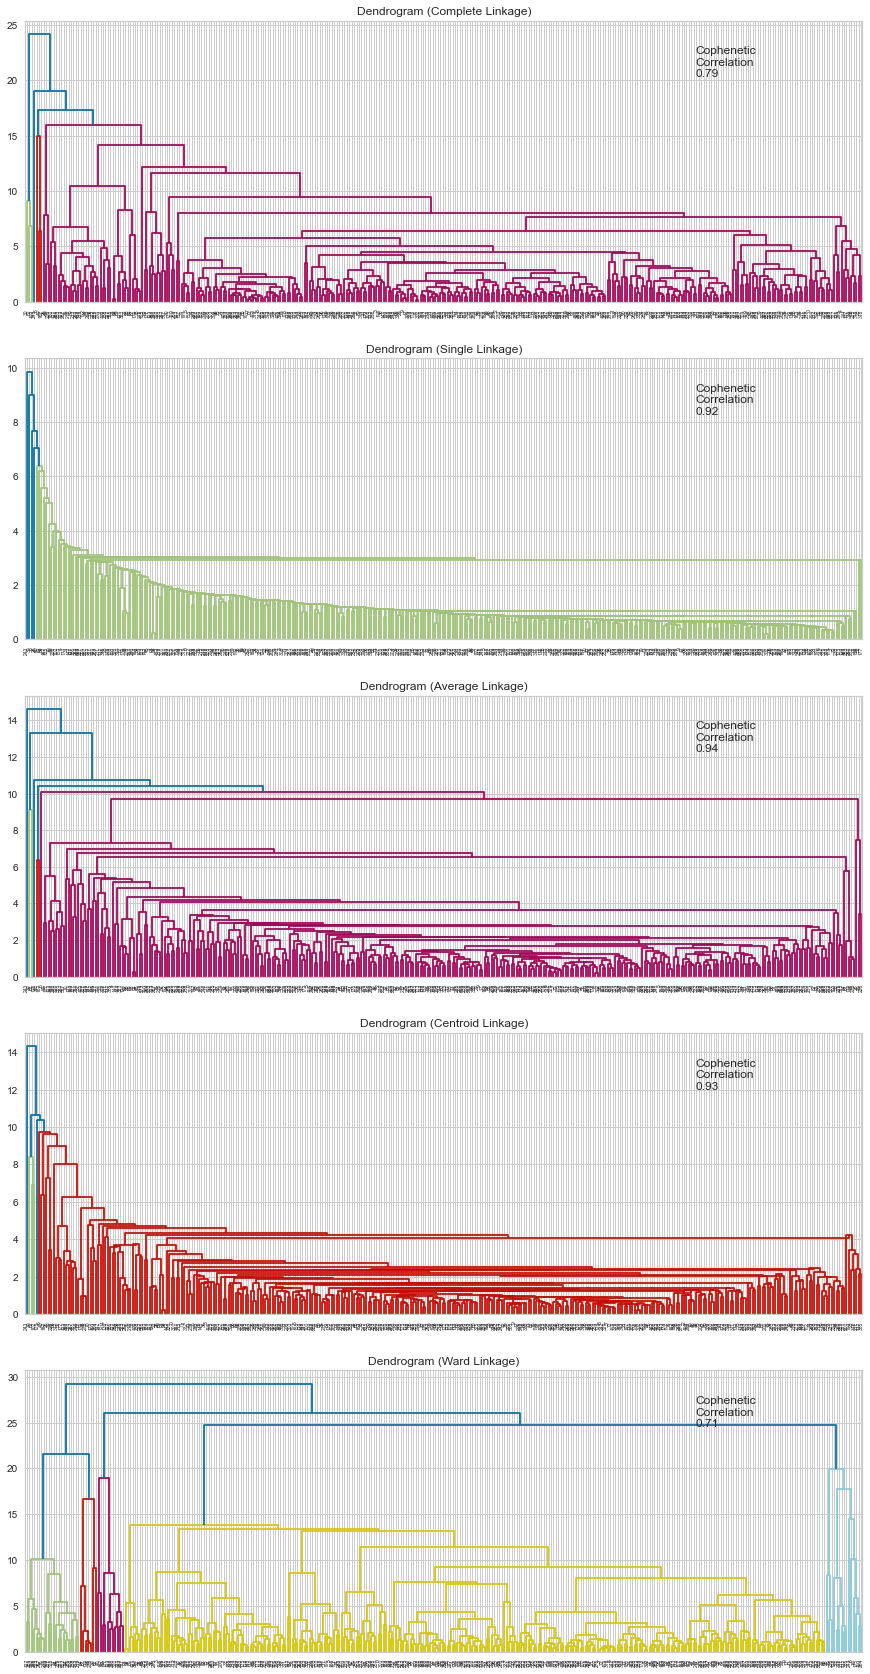

In [61]:
%%time
# list of linkage methods
linkage_methods = ["complete","single","average","centroid","ward"] ## Complete the code to add linkages

# lists to save results of cophenetic correlation calculation
compare_cols = ["Linkage", "Cophenetic Coefficient"]
compare = []

# to create a subplot image
fig, axs = plt.subplots(len(linkage_methods), 1, figsize=(15, 30))

# We will enumerate through the list of linkage methods above
# For each linkage method, we will plot the dendrogram and calculate the cophenetic correlation
for i, method in enumerate(linkage_methods):
    Z = linkage(hc_data, metric="euclidean", method=method)
    
    dendrogram(Z, ax=axs[i])
    axs[i].set_title(f"Dendrogram ({method.capitalize()} Linkage)")

    coph_corr, coph_dist = cophenet(Z, pdist(hc_data))
    axs[i].annotate(
        f"Cophenetic\nCorrelation\n{coph_corr:0.2f}",
        (0.80, 0.80),
        xycoords="axes fraction",
    )

    compare.append([method, coph_corr])

In [62]:
# create and print a dataframe to compare cophenetic correlations for different linkage methods
df_cc = pd.DataFrame(compare, columns=compare_cols)
df_cc = df_cc.sort_values(by="Cophenetic Coefficient")
df_cc

,Linkage,Cophenetic Coefficient
4,ward,0.710118
0,complete,0.787328
1,single,0.923227
3,centroid,0.931401
2,average,0.942254


### Observation:
The cophenetic coefficient with  average  and centroid linkage method is the highest. <br>
The higher the cophenetic coeficient the more the faithful  the dendogram is to the original dataset and indicates a good clustering. <br>
The average linkage method will be used. <br>
The optimal number of clusters for an average linkage is aprroximately 3

### Creating model using sklearn

In [63]:
## Code to define the hierarchical clustering model
HCmodel = AgglomerativeClustering(n_clusters=3, affinity="euclidean", linkage="average")  
HCmodel.fit(hc_data)  ## code to fit the agglomerative clustering model.

AgglomerativeClustering(linkage='average', n_clusters=3)

In [64]:
# creating a copy of the original data
data2 = data.copy()

# adding hierarchical cluster labels to the original and scaled dataframes
hc_data["HC_segments"] = HCmodel.labels_
data2["HC_segments"] = HCmodel.labels_

### Cluster Profiling

In [65]:
## Code to groupby the cluster labels
hc_cluster_profile = data2.groupby("HC_segments").mean()  

In [66]:
## Code to groupby the cluster label
hc_cluster_profile["count_in_each_segment"] = ( data2.groupby("HC_segments")["Security"].count().values)   

In [67]:
hc_cluster_profile.style.highlight_max(color="lightgreen", axis=0)

,Current Price,Price Change,Volatility,ROE,Cash Ratio,Net Cash Flow,Net Income,Earnings Per Share,Estimated Shares Outstanding,P/E Ratio,P/B Ratio,count_in_each_segment
HC_segments,,,,,,,,,,,,
0,77.653642,4.184271,1.515129,35.103858,69.798220,68662246.290801,1613508620.178041,2.900905,578930419.447478,32.466828,-1.739711,337
1,1274.949951,3.190527,1.268340,29.000000,184.000000,-1671386000.000000,2551360000.000000,50.090000,50935516.070000,25.453183,-1.052429,1
2,24.485001,-13.351992,3.482611,802.000000,51.000000,-1292500000.000000,-19106500000.000000,-41.815000,519573983.250000,60.748608,1.565141,2


In [68]:
## Complete the code to print the companies in each cluster
for cl in data2["HC_segments"].unique():
    print("In cluster {}, the following companies are present:".format(cl))
    print(data2[data2["HC_segments"] == cl]["Security"].unique())
    print()

In cluster 0, the following companies are present:
['American Airlines Group' 'AbbVie' 'Abbott Laboratories'
 'Adobe Systems Inc' 'Analog Devices, Inc.' 'Archer-Daniels-Midland Co'
 'Alliance Data Systems' 'Ameren Corp' 'American Electric Power'
 'AFLAC Inc' 'American International Group, Inc.'
 'Apartment Investment & Mgmt' 'Assurant Inc' 'Arthur J. Gallagher & Co.'
 'Akamai Technologies Inc' 'Albemarle Corp' 'Alaska Air Group Inc'
 'Allstate Corp' 'Allegion' 'Alexion Pharmaceuticals'
 'Applied Materials Inc' 'AMETEK Inc' 'Affiliated Managers Group Inc'
 'Amgen Inc' 'Ameriprise Financial' 'American Tower Corp A'
 'Amazon.com Inc' 'AutoNation Inc' 'Anthem Inc.' 'Aon plc'
 'Anadarko Petroleum Corp' 'Amphenol Corp' 'Arconic Inc'
 'Activision Blizzard' 'AvalonBay Communities, Inc.' 'Broadcom'
 'American Water Works Company Inc' 'American Express Co' 'Boeing Company'
 'Bank of America Corp' 'Baxter International Inc.' 'BB&T Corporation'
 'Bard (C.R.) Inc.' 'Baker Hughes Inc' 'BIOGEN IDEC I

In [69]:
data2.groupby(["HC_segments", "GICS Sector"])['Security'].count()

HC_segments  GICS Sector                
0            Consumer Discretionary         39
             Consumer Staples               19
             Energy                         28
             Financials                     49
             Health Care                    40
             Industrials                    53
             Information Technology         33
             Materials                      20
             Real Estate                    27
             Telecommunications Services     5
             Utilities                      24
1            Consumer Discretionary          1
2            Energy                          2
Name: Security, dtype: int64

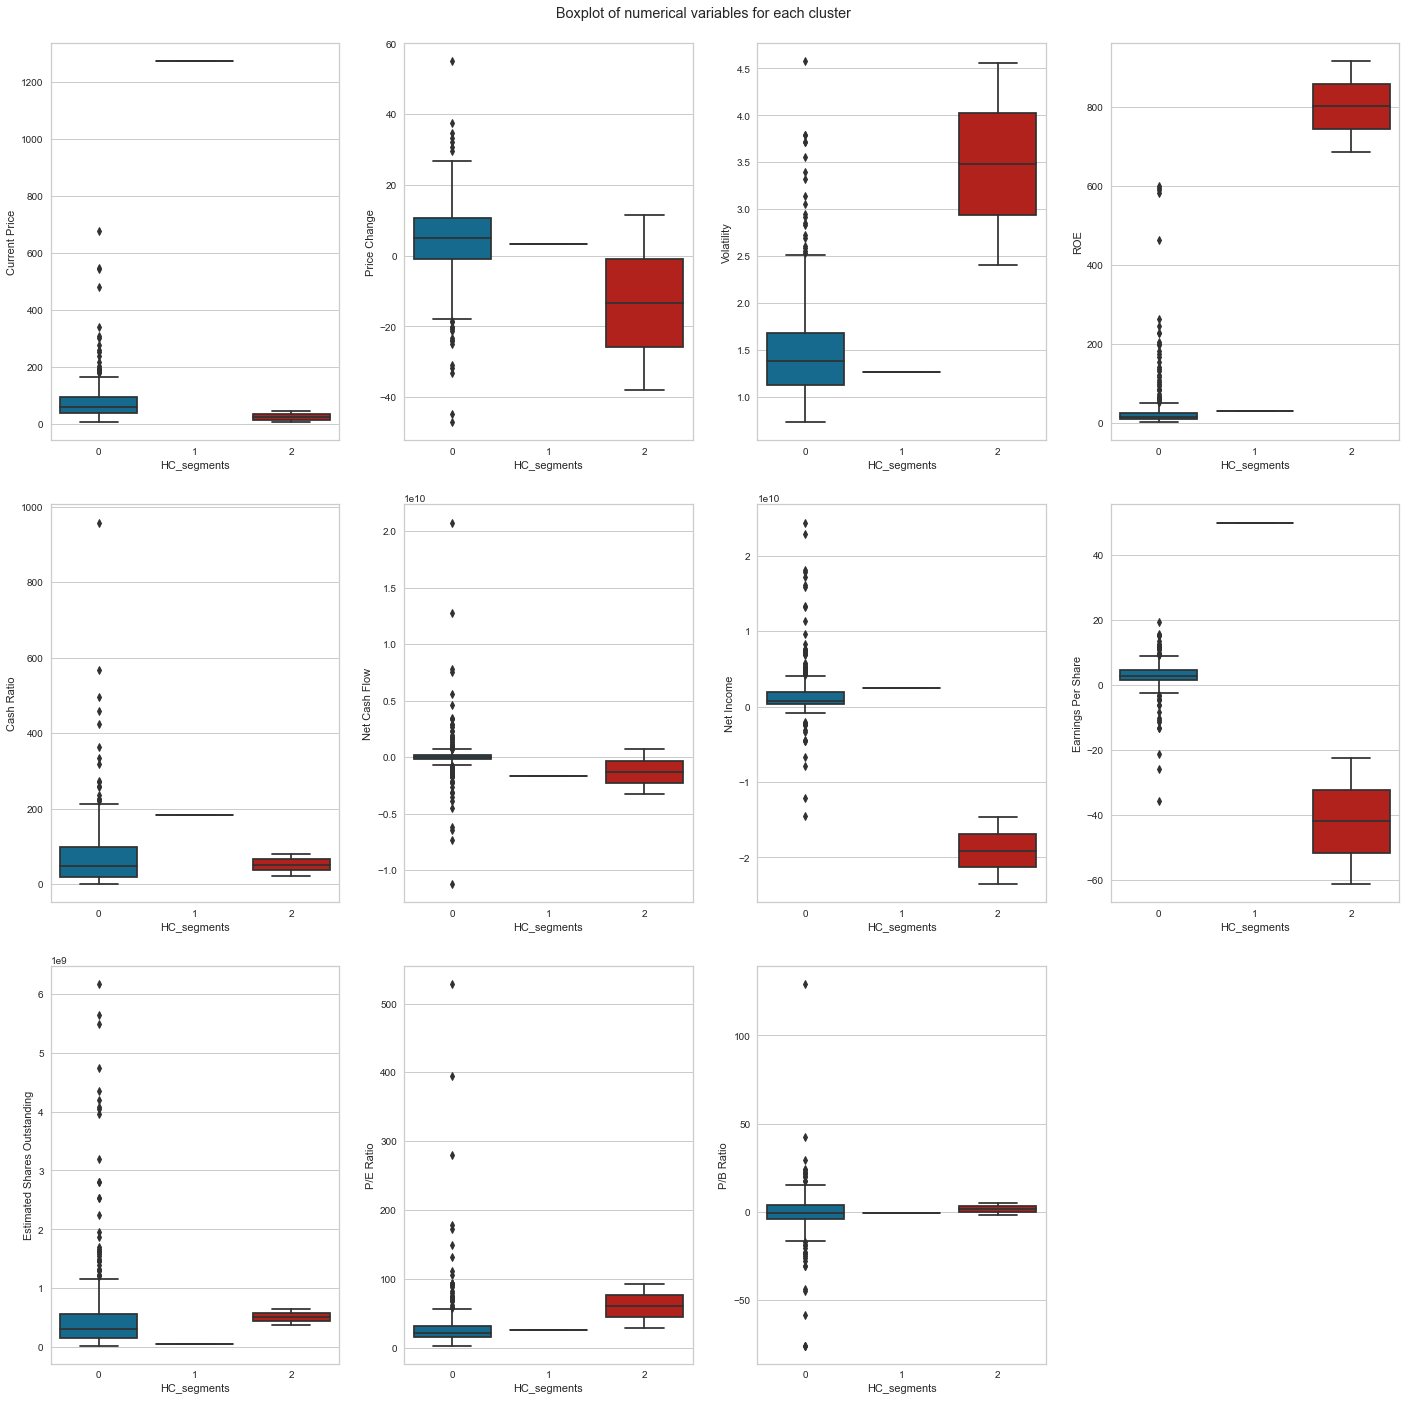

In [70]:
plt.figure(figsize=(20, 20))
plt.suptitle("Boxplot of numerical variables for each cluster")

for i, variable in enumerate(num_col):
    plt.subplot(3, 4, i + 1)
    sns.boxplot(data=data2, x="HC_segments", y=variable)

plt.tight_layout(pad=2.0)

## K-means vs Hierarchical Clustering

The K-means clustering technique takes less time for execution as compared to Hierarchical clustering technique. <br>
Both clustering techniques produced the same number of clusters. <br>
In the K-means clustering method: Cluster 0 has 14 observations that are similar, Cluster 1 has 32 observations that are similar and  Cluster 2 has 294 observations that are similar. <br>
Whereas in the Hierarchical clustering : Cluster 0 has 337  observations that are similar, Cluster 1 has one(1) observations that are similar and  Cluster 2 has two(2) observations that are similar. <br>
Both clustering techniques have the same number of observations , however the have different number of observations per cluster. <br>


## Actionable Insights and Recommendations

### Insights : Hierarchical Clustering 

#### Cluster 0:  <br>

. Consists of 337 observations that are similar. <br>
. Companies that are in this cluster have higher net income as compared to other clusters. <br>
. Most companies have current prices that range from zero to 200 dollars with outliers on the right side of the whiskers. <br>
. ROE is moderately low for companies that are in this cluster, with outliers on the right side of the whiskers. <br>
. The cash ratio is relatively balanced as compared to other clusters. <br>
. Volatility is  low in contrast to other cluster 2 . <br>

####  Cluster 1:

. Consists of 1 observations that are similar. <br>
. Volatility is very low in contrast to other clusters. <br>
. ROE is approximately zero as compared to other clusters  due to very low risk involved. <br>
. P/E ratio is relatively zero in contrast to other clusters due to  very low earnings(net income).<br>

#### Cluster 2:<br>

. Consists of 2 observations that are similar. <br>
. The net income is relatively very low as compared to other clusters.
. ROE is higher in contrast to other clusters due to  higher shareholder's equity. <br>
. P/B ratio is very low as compared to other clusters. <br>


### Recommendations 

By diversifying a portfolio using different weights on investing on different clusters can migitate the risks (volatility)  while getting a higher return. <br>
For a risk loving investor would recommend to invest in cluster 2 for a higher return that will compensate the risk.